In [17]:
from gal4H0 import *
true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.25)
zcut_rate=1.4

## Incosistency 1: $z^4$

We study the bias on $H_0$ when GW events are distributed as $p_{\rm cat}(z)^2$ while in the analysis we just account for $p_{\rm cat}(z)$. 

In [18]:
LOSf=['MICECAT_LOS/micecat_455.csv']

sigmas=[0.1,0.2,0.3]
Ngw=1000000
zcut_rate=1.4
dl_thr=1550
H0_array=np.linspace(40,120,200)

posteriors={'H0_grid':H0_array}

np.random.seed(0) # Reset the random seed
for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=draw_gw_events(10000,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)        
        pextra=np.exp(zinterpo(gw_redshift))
        idxextra=np.random.choice(len(pextra),size=200,p=pextra/pextra.sum())
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=gw_obs_dl[idxextra],gw_true_dl[idxextra],gw_redshift[idxextra],std_dl[idxextra]
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined


MICECAT_LOS/micecat_455.csv


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 48028/48028 [09:10<00:00, 87.27it/s]


0.1
You detected 2929 binaries out of 100000 simulated


200it [00:00, 321.82it/s]
Running on GW events: 200it [04:47,  1.44s/it]


0.2
You detected 3244 binaries out of 100000 simulated


200it [00:00, 268.78it/s]
Running on GW events: 200it [03:33,  1.07s/it]


0.3
You detected 4260 binaries out of 100000 simulated


200it [00:00, 447.79it/s]
Running on GW events: 200it [03:15,  1.02it/s]


In [19]:
# We generate multiple H0 posterior for 200 events, different LOS and dl errors

LOSf=['MICECAT_LOS/micecat_455.csv']

sigmas=[0.1,0.2,0.3]
Ngw=200
zcut_rate=1.4
dl_thr=1550
H0_array=np.linspace(40,120,200)

posteriors_2={'H0_grid':H0_array}
np.random.seed(0) # Reset the random seed
for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift_TH21(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors_2[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors_2[ilos+'_'+str(sigma)+'_'+'combined']=combined


MICECAT_LOS/micecat_455.csv


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 48028/48028 [06:15<00:00, 127.87it/s]


0.1
You detected 200 binaries out of 100000 simulated


200it [00:00, 493.97it/s]
Running on GW events: 200it [04:22,  1.31s/it]


0.2
You detected 200 binaries out of 100000 simulated


200it [00:00, 508.58it/s]
Running on GW events: 200it [05:04,  1.52s/it]


0.3
You detected 200 binaries out of 100000 simulated


200it [00:00, 523.33it/s]
Running on GW events: 200it [05:04,  1.52s/it]


In [20]:
LOSf=['MICECAT_LOS/micecat_455.csv']

sigmas=[0.1,0.2,0.3]
Ngw=200
dl_thr=1550
H0_array=np.linspace(40,120,200)

posteriors_3={'H0_grid':H0_array}

np.random.seed(0) # Reset the random seed
for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,1.4)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,0.3)        
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors_3[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors_3[ilos+'_'+str(sigma)+'_'+'combined']=combined


MICECAT_LOS/micecat_455.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 48028/48028 [1:00:13<00:00, 13.29it/s]


0.1
You detected 200 binaries out of 100000 simulated


200it [00:00, 266.28it/s]
Running on GW events: 200it [04:51,  1.46s/it]


0.2
You detected 200 binaries out of 100000 simulated


200it [00:00, 262.40it/s]
Running on GW events: 200it [05:12,  1.56s/it]


0.3
You detected 200 binaries out of 100000 simulated


200it [00:00, 247.02it/s]
Running on GW events: 200it [09:41,  2.91s/it]


In [21]:
LOSf=['MICECAT_LOS/micecat_901.csv']

sigmas=[0.1,0.2,0.3]
Ngw=200
dl_thr=1550
H0_array=np.linspace(40,120,200)

posteriors_4={'H0_grid':H0_array}

np.random.seed(0) # Reset the random seed
for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,1.4)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)        
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift_GWlikelihood_inconsistency(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors_4[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors_4[ilos+'_'+str(sigma)+'_'+'combined']=combined


MICECAT_LOS/micecat_901.csv


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 944/944 [00:10<00:00, 86.39it/s]


0.1
You detected 200 binaries out of 100000 simulated


200it [00:00, 508.03it/s]
Running on GW events: 200it [03:11,  1.04it/s]


0.2
You detected 200 binaries out of 100000 simulated


200it [00:00, 484.46it/s]
Running on GW events: 200it [03:06,  1.07it/s]


0.3
You detected 200 binaries out of 100000 simulated


200it [00:00, 521.09it/s]
Running on GW events: 200it [03:17,  1.01it/s]


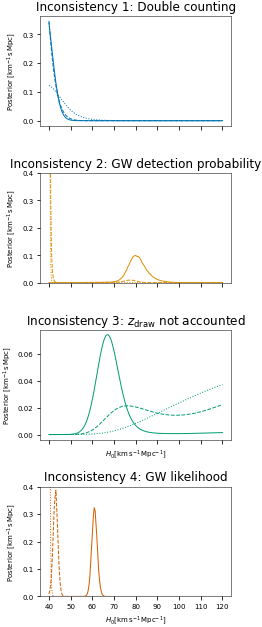

In [31]:
fig, ax= plt.subplots(4,1,figsize=(3.5,9),sharex=True)

ilos='MICECAT_LOS/micecat_455.csv'
sigmas=[0.1,0.2,0.3]

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']

lines=['solid','--',':']

for i,sigma in enumerate(sigmas):
    ax[0].plot(H0_array,posteriors[ilos+'_'+str(sigma)+'_'+'combined'],ls=lines[i],label=labels_2[i],c=pal[0])
    ax[1].plot(H0_array,posteriors_2[ilos+'_'+str(sigma)+'_'+'combined'],ls=lines[i],label=labels_2[i],c=pal[1])
    ax[2].plot(H0_array,posteriors_3[ilos+'_'+str(sigma)+'_'+'combined'],ls=lines[i],label=labels_2[i],c=pal[2])
    ax[3].plot(H0_array,posteriors_4['MICECAT_LOS/micecat_901.csv_'+str(sigma)+'_'+'combined'],ls=lines[i],label=labels_2[i],c=pal[3])

    
ax[0].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$')
ax[0].set_title('Inconsistency 1: Double counting')

ax[1].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$')
ax[1].set_title('Inconsistency 2: GW detection probability')
ax[1].set_ylim(0,0.4)

ax[2].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$')
ax[2].set_title(r'Inconsistency 3: $z_{\rm draw}$ not accounted')
ax[2].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')

ax[3].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$')
ax[3].set_title(r'Inconsistency 4: GW likelihood')
ax[3].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
ax[3].set_ylim(0,0.4)

plt.tight_layout()
plt.savefig('figures_paper/inconsistencies_4.pdf')


